# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# import the training dataset

In [2]:
df = pd.read_csv('Training.csv')

# check the dataset

In [3]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


# check for null-nan values

In [4]:
df.isnull().mean() * 100

itching                   0.0
skin_rash                 0.0
nodal_skin_eruptions      0.0
continuous_sneezing       0.0
shivering                 0.0
                        ...  
blister                   0.0
red_sore_around_nose      0.0
yellow_crust_ooze         0.0
prognosis                 0.0
Unnamed: 133            100.0
Length: 134, dtype: float64

# drop null-nan columns

In [5]:
df.drop('Unnamed: 133', axis=1, inplace=True)

In [6]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


# check the values of the target column

<Axes: xlabel='prognosis'>

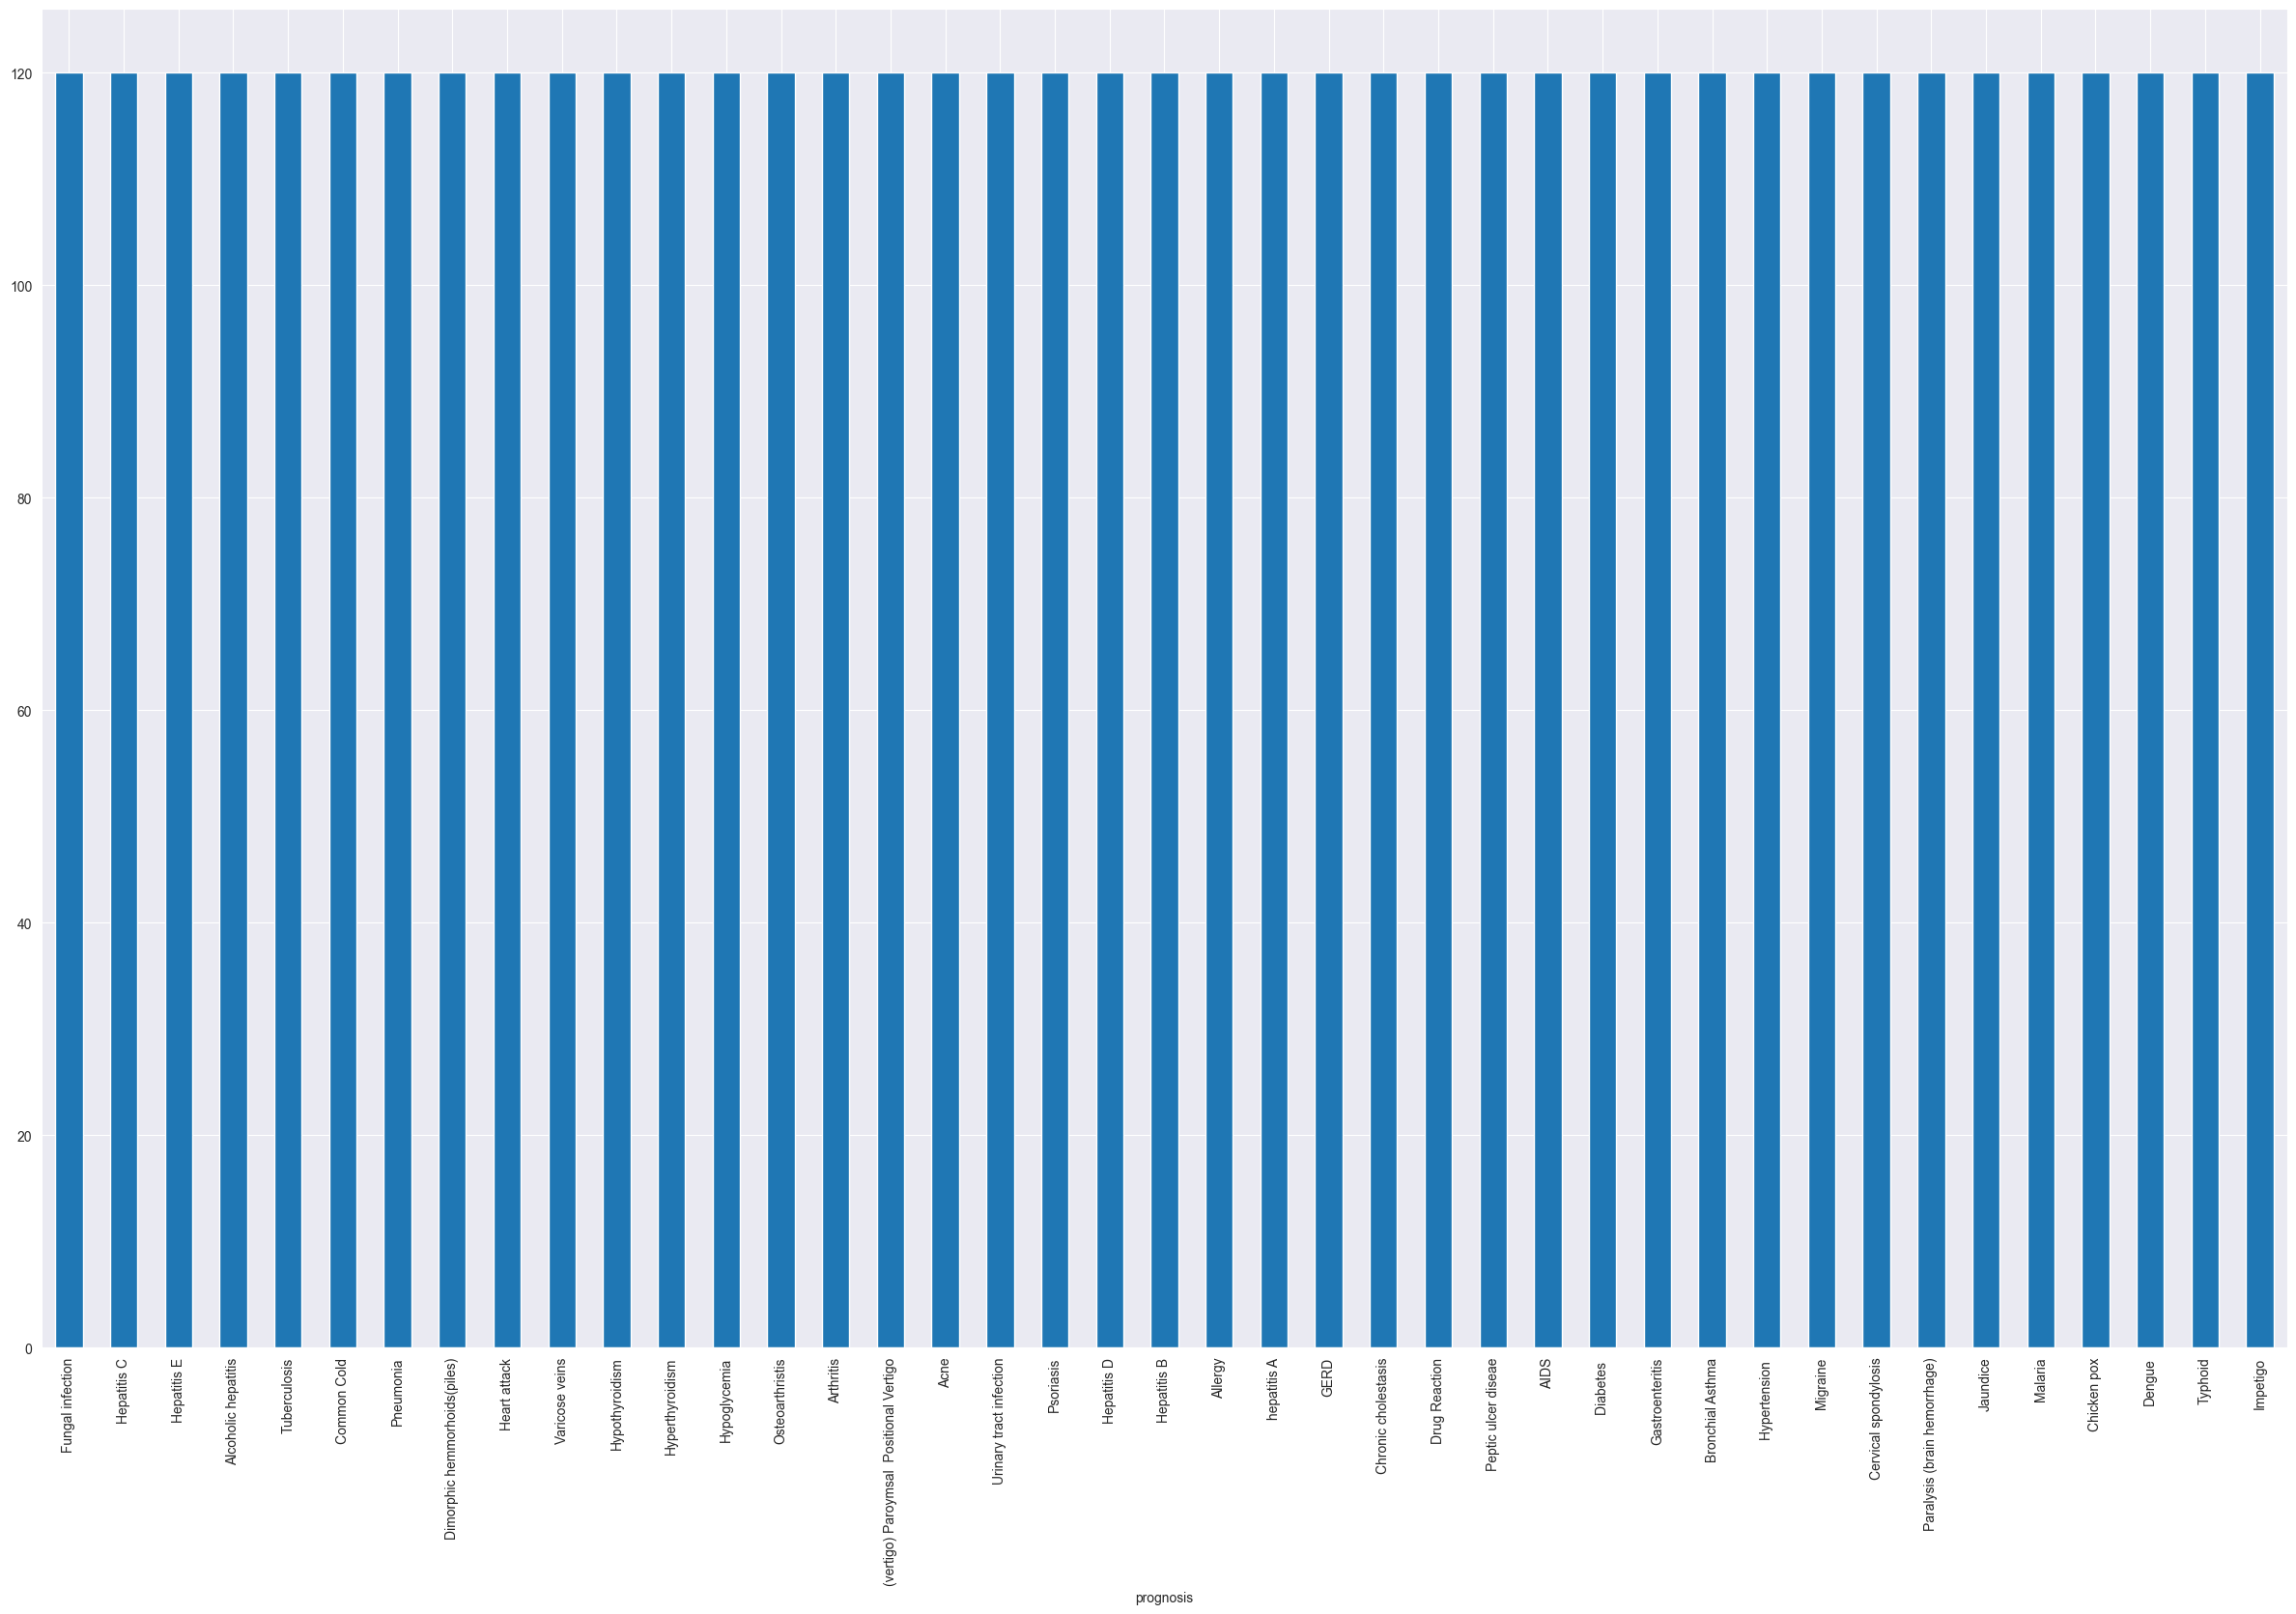

In [7]:
plt.figure(figsize=(30, 18))

df['prognosis'].value_counts().plot(kind='bar')

# convert the target column (prognosis) from string values to numerical

In [8]:
# import label encoder class
from sklearn.preprocessing import LabelEncoder

# create an object of label encoder
le = LabelEncoder()

df['prognosis'] = le.fit_transform(df['prognosis'])

# split the dataset

In [9]:
# import train_split function
from sklearn.model_selection import train_test_split

# all data except the target column
X = df.drop('prognosis', axis=1)

# target column
y = df['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ML Training

In [10]:
# first using a KNN model
from sklearn.neighbors import KNeighborsClassifier

# create an object of KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

# create random 2-D array list to predict what disease will have

In [11]:
# columns value range
list_range = [0, 1]

# number of columns
column_range = 132

# empty 2-D array
features = np.array([[]])

# make random choices for prediction
for i in range(column_range):
    random_value = random.choice(list_range)
    features = np.append(features, random_value)

# reshape the array
features = features.reshape(1, -1)

# predict the disease

In [12]:
y_pred = knn.predict(features)

C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
# invert to the original string value to see the disease

predicted_label = le.inverse_transform(y_pred)

print(f'Predicted Disease: {predicted_label}')

Predicted Disease: ['hepatitis A']


# model accuracy

In [14]:
# predictions for all the dataset
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, recall_score, \
    precision_score

y_pred = knn.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy for KNN model: {accuracy}')

Accuracy for KNN model: 1.0


# Model Metrics

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        27
          17       1.00    

# Naive Bayes Model

In [16]:
# import NB model
from sklearn.naive_bayes import GaussianNB

# create an instance of NB
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# NB prediction

In [17]:
y_pred = gnb.predict(features)

predicted_label = le.inverse_transform(y_pred)

print(f'Predicted Disease from NB: {predicted_label}')

Predicted Disease from NB: ['hepatitis A']


C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# accuracy score

In [20]:
y_pred = gnb.predict(X_test)

nb_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy for Naive Bayes model: {nb_accuracy}')

Accuracy for Naive Bayes model: 1.0


# SVM

In [23]:
# import SVM model
from sklearn.svm import SVC

# create a SVM object

svc = SVC()

# fit the model
svc.fit(X_train, y_train)

SVC()

# SVM prediction

In [24]:
y_pred = svc.predict(features)

predicted_label = le.inverse_transform(y_pred)

print(f'Predicted Disease by SVM: {predicted_label}')

Predicted Disease by SVM: ['Dengue']


C:\Users\nick-\PycharmProjects\pythonProject1\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Model accuracy

In [25]:
y_pred = svc.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy for SVM model: {svm_accuracy}')

Accuracy for SVM model: 1.0


In [27]:
print(f1_score(y_test, y_pred, average='macro'))

1.0
